<a href="https://colab.research.google.com/github/AzamChatrAzar/cattegorical-dataset/blob/main/iris_good_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from seaborn import set_style
set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# بارگذاری دیتاست Iris
iris = load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data["target"]=iris.target
data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.12

)


In [5]:
k = int(np.sqrt(len(X_train)))
print(f"تعداد همسایه‌ها (k): {k}")


تعداد همسایه‌ها (k): 11


In [6]:
#  آموزش و پیش‌بینی با KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [7]:

#  محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f"\nدقت مدل KNN روی داده تست: {accuracy:.1%}")
print(f"تعداد داده‌های تست: {len(X_test)}")




دقت مدل KNN روی داده تست: 94.4%
تعداد داده‌های تست: 18


In [21]:
# Kmean
#پیدا کردن kمناسب با استفده از elbow

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from seaborn import set_style
set_style('darkgrid')

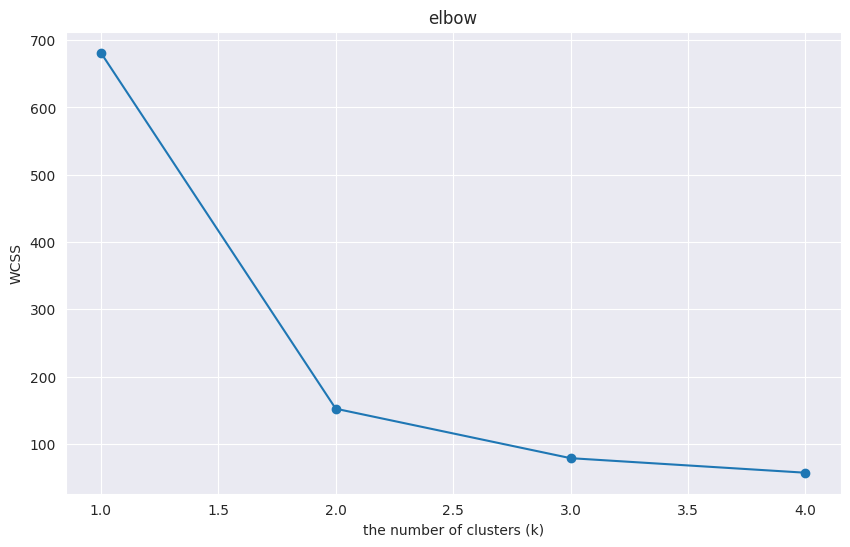

the optimal number of clustters: 3


In [9]:



wcss = []  # مجموع مربعات درون کلاسترها
max_k = 4 # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



# محاسبه نقطه عطف  به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر


# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clustters: {optimal_k}")





In [26]:
#  K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)



KMeans(n_clusters=np.int64(3))

In [27]:
# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_


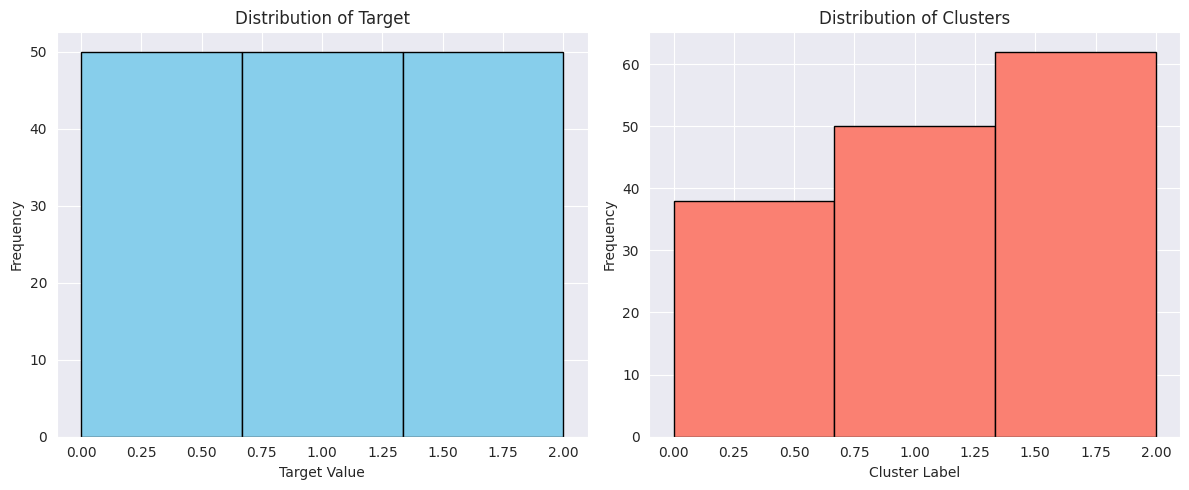

In [28]:
plt.figure(figsize=(12, 5))

# هیستوگرام Target
plt.subplot(1, 2, 1)
plt.hist(data['target'], bins=optimal_k, color='skyblue', edgecolor='black')
plt.title('Distribution of Target')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# هیستوگرام Cluster
plt.subplot(1, 2, 2)
plt.hist(data['Cluster'], bins=optimal_k, color='salmon', edgecolor='black')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
import seaborn as sns

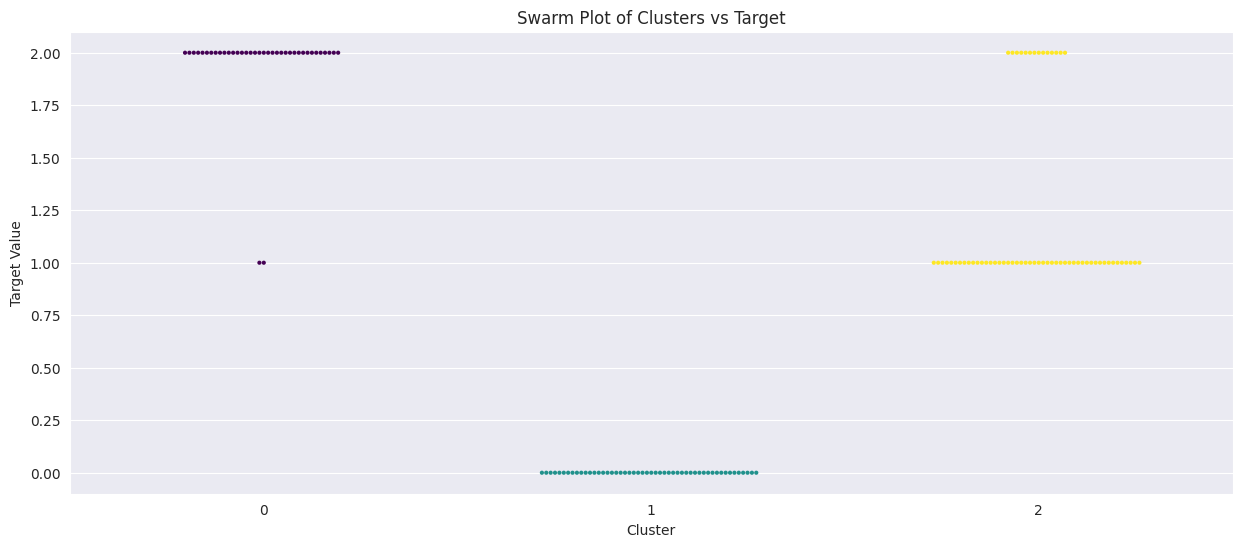

In [30]:
plt.figure(figsize=(15, 6))
sns.swarmplot(
    x='Cluster',
    y='target',
    hue='Cluster',
    data=data,
    palette='viridis',
    legend=False,
    size=3
)
plt.title('Swarm Plot of Clusters vs Target')
plt.xlabel('Cluster')
plt.ylabel('Target Value')
plt.show()

In [31]:
# پیش‌بینی کلاسترها با K-Means
predicted_labels = kmeans.labels_




In [32]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment


In [33]:
# ماتریس درهم‌ریختگی (Confusion Matrix)
cm = confusion_matrix(y, predicted_labels)

# یافتن بهترین نگاشت بین برچسب‌های واقعی و پیش‌بینی‌شده (Hungarian Algorithm)
row_ind, col_ind = linear_sum_assignment(-cm)  # علامت منفی برای ماکزیمم کردن تطابق

# ایجاد یک دیکشنری برای نگاشت برچسب‌ها
label_mapping = {predicted: actual for actual, predicted in zip(row_ind, col_ind)}
print("\nنگاشت برچسب‌های پیش‌بینی‌شده به تارگت اصلی:")
print(label_mapping)

# تبدیل برچسب‌های پیش‌بینی‌شده به تارگت اصلی
adjusted_predicted = np.array([label_mapping[label] for label in predicted_labels])

# مقایسه adjusted_predicted با y برای یافتن داده‌های صحیح
correctly_clustered_mask = (adjusted_predicted == y)

# **حذف داده‌های اشتباه کلاستر شده (فقط نگه‌داشتن داده‌های صحیح)**
filtered_X = X[correctly_clustered_mask]
filtered_y = y[correctly_clustered_mask]

# نمایش نتایج
print(f"\nتعداد کل داده‌ها: {len(X)}")
print(f"تعداد داده‌های صحیح کلاستر شده: {len(filtered_X)}")
print(f"تعداد داده‌های اشتباه کلاستر شده (حذف شده): {len(X) - len(filtered_X)}")



نگاشت برچسب‌های پیش‌بینی‌شده به تارگت اصلی:
{np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(0): np.int64(2)}

تعداد کل داده‌ها: 150
تعداد داده‌های صحیح کلاستر شده: 134
تعداد داده‌های اشتباه کلاستر شده (حذف شده): 16


In [34]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['Actual_Cluster'] = y
df['Predicted_Cluster'] = predicted_labels
df['Adjusted_Predicted'] = adjusted_predicted
df['Is_Correct'] = correctly_clustered_mask


In [35]:
# 1. تقسیم داده‌های فیلتر شده به آموزش و تست (85% آموزش، 15% تست)
X_train, X_test, y_train, y_test = train_test_split(
    filtered_X,
    filtered_y,
    test_size=0.15
)

# 2. محاسبه مقدار k بهینه برای KNN
k = int(np.sqrt(len(X_train)))  # قانون کلی برای انتخاب k
print(f"تعداد همسایه‌های استفاده شده (k): {k}")

# 3. آموزش مدل KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4. پیش‌بینی روی داده تست
y_pred = knn.predict(X_test)

# 5. محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f"\nدقت مدل KNN روی داده تست: {accuracy:.2%}")



تعداد همسایه‌های استفاده شده (k): 10

دقت مدل KNN روی داده تست: 100.00%


Text(0, 0.5, 'Accuracy')

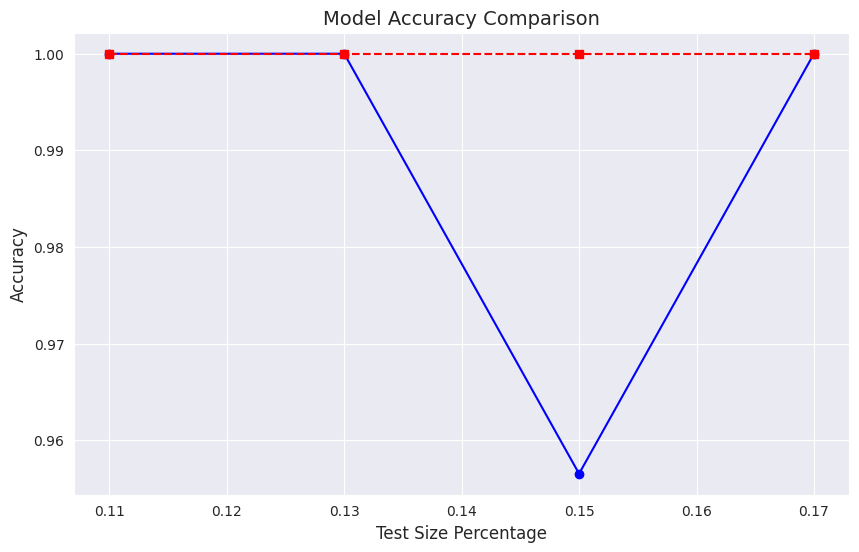

In [36]:
# محدوده تست‌ها
test_sizes = np.arange(0.11, 0.18, 0.02)
original_acc = []
filtered_acc = []

plt.figure(figsize=(10, 6))

for test_size in test_sizes:
    # 1. محاسبه برای داده‌های اصلی
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    k = int(np.sqrt(len(X_train)))
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    original_acc.append(knn.score(X_test, y_test))

    # 2. محاسبه برای داده‌های فیلتر شده
    X_train, X_test, y_train, y_test = train_test_split(
        filtered_X, filtered_y, test_size=test_size)
    k = int(np.sqrt(len(X_train)))
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    filtered_acc.append(knn.score(X_test, y_test))

# رسم نمودارها
plt.plot(test_sizes, original_acc, 'bo-', label='Original Data')
plt.plot(test_sizes, filtered_acc, 'rs--', label='Filtered Data')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Test Size Percentage', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)